# Deep Learning

## 🔬 Learning microstructure

While chemical bonds and the unit cells of crystalline materials are defined at the nanometre scale, morphological features such as grains and voids emerge at the micron scale. How the microscopic building blocks are arranged determines how strong, durable, or conductive a material can be.

### From perceptrons to neural networks

The perceptron is a fundamental building block of artificial neural networks. Inspired by the way neurons in the brain work, a perceptron takes multiple inputs, applies weights to each input, sums them up, and passes the result through an activation function to produce an output. It is a binary classifier and can be trained to learn linear decision boundaries for simple classification tasks.

The perceptron function can be represented mathematically as:

$$
f(x) = \begin{cases}
1, & \text{if } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0, & \text{otherwise}
\end{cases}
$$

where:
- $f(x)$ represents the output of the perceptron for input $x$
- $w_i$ are the weights associated with input features $x_i$
- $b$ is the bias term
- $n$ is the number of input features

In [1]:
# Installation of libraries
!pip install scikit-image --quiet
!pip install torchvision --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import of modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Image processing

### Classical convolutional filters

1. **Gaussian**
   - Smoothes an image by reducing noise.
   - Blurs the image by applying a weighted average to pixels.
   - Kernel:
     ```
     1  2  1
     2  4  2
     1  2  1
     ```

2. **Sobel**
   - Highlights edges and contours in an image.
   - Computes gradient magnitude using convolutional kernels.
   - Sobel Horizontal Kernel:
     ```
     -1  0  1
     -2  0  2
     -1  0  1
     ```
   - Sobel Vertical Kernel:
     ```
     -1 -2 -1
      0  0  0
      1  2  1
     ```
     
3. **Laplacian**
   - Emphasizes rapid intensity changes (edges).
   - Calculates the second derivative to highlight inflection points.
   - Laplacian Kernel:
     ```
      0  1  0
      1 -4  1
      0  1  0
     ```

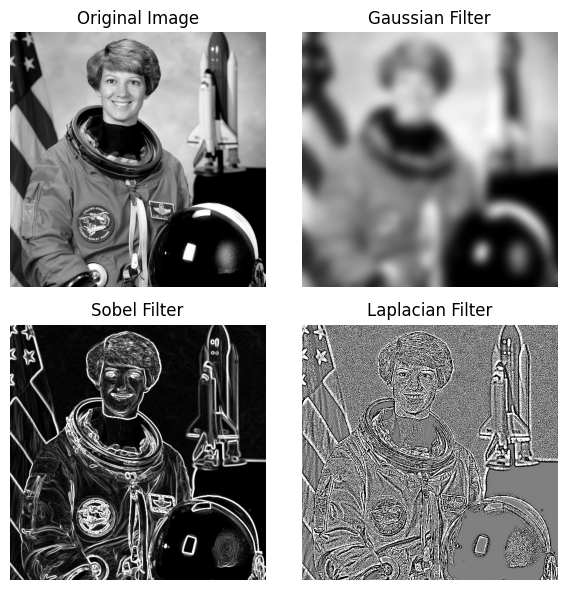

In [3]:
from skimage import io, data, color, filters

# Load an example image (you can replace this with your own)
#image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5e/AlubronzeCuAl20v500.png"
#image_url = "https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg"
#image = io.imread(image_url)
image = data.astronaut()
gray_image = color.rgb2gray(image)

# Apply classical image filters
gaussian_filtered = filters.gaussian(gray_image, sigma=10.0)
sobel_filtered = filters.sobel(gray_image)
laplacian_filtered = filters.laplace(gray_image)

# Plot the original and filtered images
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_filtered, cmap='gray', vmin=0, vmax=0.2)  # Adjust vmin and vmax as needed
plt.title('Sobel Filter')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_filtered, cmap='gray', vmin=-0.02, vmax=0.02)  # Adjust vmin and vmax as needed
plt.title('Laplacian Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

### Custom convolutional filters

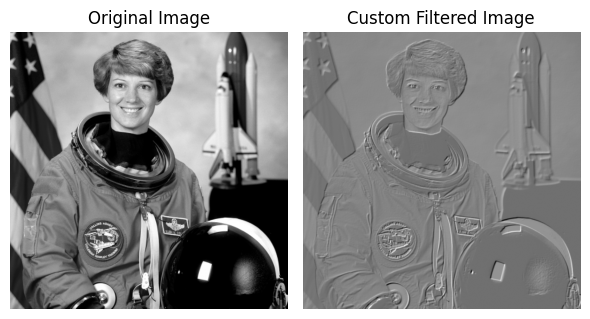

In [4]:
from scipy.ndimage import convolve

# Load an example image (you can replace this with your own)
#image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5e/AlubronzeCuAl20v500.png"
#image_url = "https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg"
#image = io.imread(image_url)
image = data.astronaut()
gray_image = color.rgb2gray(image)

# Define a larger custom kernel for more noticeable effect
custom_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# Normalise the kernel to sum to 1
custom_kernel = custom_kernel / np.sum(custom_kernel)

# Apply custom kernel using convolution
num_iterations = 1 # Number of times to apply the convolution

custom_filtered = gray_image.copy()
for _ in range(num_iterations):
    custom_filtered = convolve(custom_filtered, custom_kernel)

# Plot the original and filtered images
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(custom_filtered, cmap='gray')
plt.title('Custom Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Convolutional Neural Networks (CNNs)

CNNs are a class of deep learning models designed for image analysis. A basic CNN architecture is built using the deep learning tool `pytorch`.

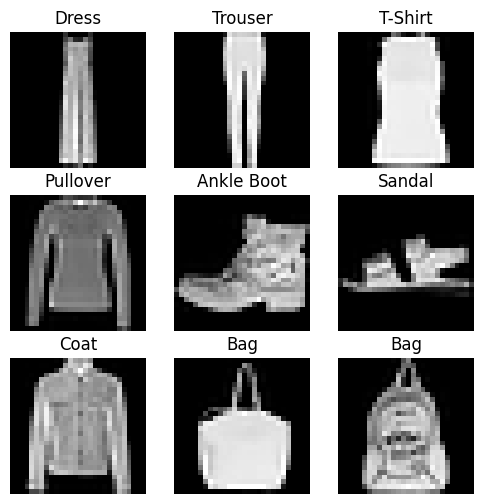

In [8]:
import torch  # PyTorch deep learning library
import torch.nn as nn  # Neural network modules in PyTorch
import torch.optim as optim  # Optimisation algorithms in PyTorch
from torch.utils.data import Dataset, DataLoader  # PyTorch data loading utilities
from torchvision import datasets  # Datasets for computer vision tasks
from torchvision.transforms import ToTensor  # Image transformations in PyTorch

# Step 1 - Data

# Training set
training_data = datasets.FashionMNIST(
    root="data", # Data will be saved in "data" folder in the current directory
    train=True, # Load the training set (or the test set if train=False)
    download=True, # Automatically download from the network if the dataset does not exist, 
    transform=ToTensor() # Convert each image into a PyTorch tensor with pixel values ​​changing from [0, 255] to [0.0, 1.0].
)

# Test set
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # Load the test set
    download=True,
    transform=ToTensor()
)

# FashionMNIST labels
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Plot a few examples
figure = plt.figure(figsize=(6, 6))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    # .squeeze is to remove the dimension with size 1, transforming [1, 28, 28] into [28, 28]
    # FashionMNIST is a grayscale image
	# Grayscale has only 1 channel
	# RGB images have 3 channels
plt.show()

In [11]:
# Step 2 - Model

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        # Call the constructor of the parent class (nn.Module)
        super(SimpleCNN, self).__init__()  # Initialize nn.Module

        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, # Number of input channels
                               out_channels=32, # Number of output channels (number of filters)
                               kernel_size=3, # Kernel size (3x3)
                               padding=1 # Padding around the input channels (0)
                               )
        self.relu1 = nn.ReLU()  # ReLU activation function: Change negative numbers to 0 and leave positive numbers to increase non-linearity
        self.pool1 = nn.MaxPool2d( # Max pooling layer
            kernel_size=2, # Take the maximum value for each 2x2 area
            stride=2 # Size halved
            ) 
		# Input: [N, 1, 28, 28]
		# Conv1: [N, 32, 28, 28]
		# Pool1: [N, 32, 14, 14]

        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.relu2 = nn.ReLU()  # ReLU activation function
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
		# Conv2: [N, 64, 14, 14]
		# Pool2: [N, 64, 7, 7]
        
        # Flatten the output for the fully connected layers
        self.flatten = nn.Flatten()
		# flatten: [N, 64*7*7] = [N, 3136]

        # First Fully Connected Layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Input: 3136 numbers
		# Output: 128 neurons
        self.relu3 = nn.ReLU()  # ReLU activation function

        # Second Fully Connected Layer (Output Layer)
        self.fc2 = nn.Linear(128, 10)  # 10 output neurons for the 10 classes (FashionMNIST has 10 categories)

    def forward(self, x):
        # Forward pass through the network

        # First Convolutional Layer
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        # Second Convolutional Layer
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Flatten the output for the fully connected layers
        x = self.flatten(x)

        # First Fully Connected Layer
        x = self.fc1(x)
        x = self.relu3(x)

        # Second Fully Connected Layer (Output Layer)
        x = self.fc2(x)

        return x  # Return the output

In [ ]:
# Step 3 - Train and Test

# Instantiate the model
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam( # Adam = Adaptive Moment Estimation
    model.parameters(), # This hands over all the weights and biases in the model to the optimizer, and only the parameters that are put in are updated during training.
    lr=0.001 # Learning Rate
    )

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create DataLoader for training and testing datasets
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)
# Each loop of train_dataloader will send back:
# 1. data, shape: [batch_size, channels, H, W]
# 2. target, shape: [batch_size]

# Training loop
num_epochs = 1

for epoch in range(num_epochs):
    model.train() # Switch to "Train Mode"
    for batch_idx, (data, target) in enumerate(train_dataloader): # enumerate() produces 'index' and 'item', while 'item' produces (data, target)
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad() # Gradients can accumulate, therefore clearing them is crucial
        output = model(data)
        loss = criterion(output, target)
        loss.backward() # Calculate gradient
        optimizer.step() # Update weights

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx}/{len(train_dataloader)}, Loss: {loss.item()}")

# Test the model
model.eval() # Switch to "Evaluation Mode"
correct, total = 0, 0

with torch.no_grad(): # Only calculate the result, not calculate the gradient or record the calculation process
    for data, target in test_dataloader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output, dim=1) # dim specifies the axis (dimension) along which an operation is performed. After the operation, that dimension is “reduced” or “removed.”
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Epoch 1/1, Batch 0/938, Loss: 2.3047842979431152
Epoch 1/1, Batch 100/938, Loss: 0.43713220953941345
Epoch 1/1, Batch 200/938, Loss: 0.5080423355102539
Epoch 1/1, Batch 300/938, Loss: 0.3688289523124695
Epoch 1/1, Batch 400/938, Loss: 0.4356676936149597
Epoch 1/1, Batch 500/938, Loss: 0.3631114661693573
Epoch 1/1, Batch 600/938, Loss: 0.35561808943748474
Epoch 1/1, Batch 700/938, Loss: 0.36123451590538025
Epoch 1/1, Batch 800/938, Loss: 0.48319610953330994
Epoch 1/1, Batch 900/938, Loss: 0.34713825583457947
Accuracy on the test set: 87.90%


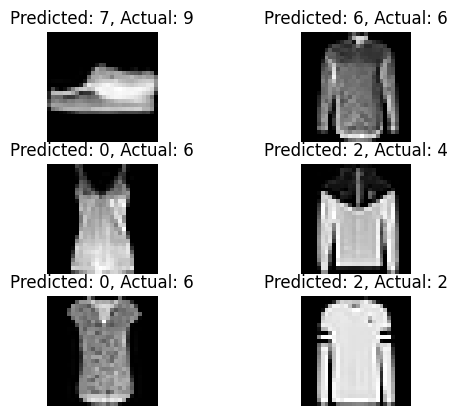

In [ ]:
# Function to display images with their predicted and actual labels
def show_predictions(model, dataloader, num_images=5):
    model.eval()
    images, predictions, targets = [], [], []

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)

            images.append(data.cpu().numpy())
            predictions.append(predicted.cpu().numpy())
            targets.append(target.cpu().numpy())

    images = np.concatenate(images)
    predictions = np.concatenate(predictions)
    targets = np.concatenate(targets)

    # Plot random predictions
    indices = np.random.choice(len(images), num_images, replace=False) # replace=False → No repetition

    plt.figure(figsize=(6, 10))
    for i, index in enumerate(indices, 1):
        plt.subplot(num_images, 2, i)
        plt.imshow(images[index][0], cmap='gray')
        plt.title(f"Predicted: {predictions[index]}, Actual: {targets[index]}")
        plt.axis('off')

    plt.show()

# Show predictions on the test set
show_predictions(model, test_dataloader, num_images=6)

Did it perform well? Remember the labels were:
```
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
```

### Learned filters

We can analyse the filters that were learned for the trained model. These can add some interpretibility for larger image models with insights into the important edges, textures, and patterns that become more complex for deeper layers.

Filter 1 weights:
[[ 0.14608069  0.11238295  0.01941579]
 [ 0.2994744  -0.24631602  0.20390081]
 [ 0.24722752  0.2734191  -0.28069183]]

Filter 2 weights:
[[ 0.2575702  -0.22502474  0.02346928]
 [ 0.36718968 -0.18555628 -0.14503534]
 [ 0.16180961  0.10964839 -0.26957217]]

Filter 3 weights:
[[ 0.33615142  0.30042154  0.36555195]
 [ 0.1945813  -0.164846    0.05734071]
 [-0.19570485  0.31098276 -0.11286163]]

Filter 4 weights:
[[-0.08505411  0.03445828 -0.11687838]
 [ 0.20407785 -0.2035986   0.04073377]
 [ 0.34864447  0.30890873  0.27744868]]



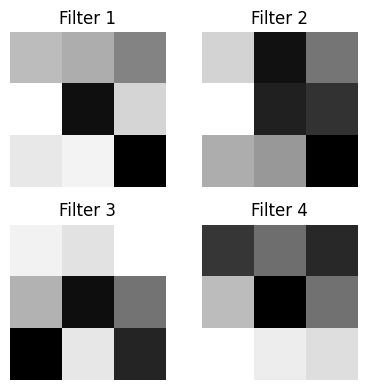

In [ ]:
# Get the weights of the first convolutional layer
conv1_weights = model.conv1.weight.data.cpu()

# Visualise learned filters
plt.figure(figsize=(4, 4))
for i in range(4):  # Only the first four filters
    plt.subplot(2, 2, i + 1)

    # Plot the image representation of the filter
    filter_image = conv1_weights[i].numpy()[0]
    plt.imshow(filter_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Filter {i + 1}")

    # Display the matrix representation of the filter
    print(f"Filter {i + 1} weights:")
    print(conv1_weights[i][0].numpy())
    print()

plt.tight_layout()
plt.show()

## Problem: Microscopy Image Reconstruction

The workflow has four stages:

1. **Data generation** – Create a synthetic dataset of 50×50 pixel images with missing values, along with their complete (ground truth) versions.
2. **Model creation** – Build a simple CNN in PyTorch to perform pixel-wise prediction.
3. **Training** – Minimise the mean squared error (MSE) loss between predicted and ground truth images.
4. **Evaluation** – Test the model’s reconstruction performance on an unseen image.

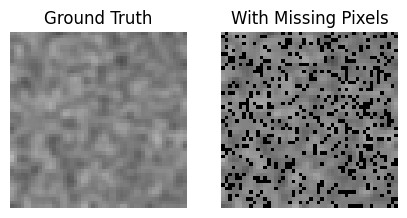

In [ ]:
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt

def generate_image_with_missing_pixels(image_size, missing_ratio=0.20, mean=128, std=50, sigma=1, seed=None):
    """
    Generate a synthetic microstructure image with random missing pixels.

    Parameters
    ----------
    image_size : tuple
        Dimensions of the generated image (height, width).
    missing_ratio : float
        Fraction of pixels to set as missing (0 → none, 1 → all missing).
    mean : float
        Mean pixel intensity before smoothing.
    std : float
        Standard deviation of pixel intensities before smoothing.
    sigma : float
        Standard deviation of the Gaussian filter (controls smoothness).
    seed : int or None
        Random seed for reproducibility. If None, randomness is not fixed.

    Returns
    -------
    image : np.ndarray
        Image with missing pixels set to 0.
    ground_truth : np.ndarray
        Original unmasked image.
    """
    if seed is not None:
        np.random.seed(seed)

    # Generate base texture
    image_raw = np.random.normal(mean, std, size=image_size).astype(np.uint8)
    image = gaussian_filter(image_raw, sigma=sigma)
    image = np.clip(image, 1, 255)

    ground_truth = image.copy()

    # Apply missing pixel mask
    num_missing_pixels = int(image_size[0] * image_size[1] * missing_ratio)
    missing_indices = np.random.choice(image_size[0] * image_size[1], size=num_missing_pixels, replace=False)
    image_flat = image.reshape(-1)
    image_flat[missing_indices] = 0
    image = image_flat.reshape(image_size)

    return image, ground_truth

# Generate one reproducible sample
sample_image, ground_truth = generate_image_with_missing_pixels(
    image_size=(50, 50),
    missing_ratio=0.20,
    seed=412
)

# Plot
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sample_image, cmap='gray', vmin=0, vmax=255)
plt.title('With Missing Pixels')
plt.axis('off')

plt.show()

In [14]:
print("Shape of matrix storing image:", sample_image.shape) # (height, width)
print("Value of each pixel corresponds to grey scale (0-255):", sample_image[1,1])

Shape of matrix storing image: (50, 50)
Value of each pixel corresponds to grey scale (0-255): 119


Epoch [1/5] Loss: 2.8731
Epoch [2/5] Loss: 0.0033
Epoch [3/5] Loss: 0.0033
Epoch [4/5] Loss: 0.0045
Epoch [5/5] Loss: 0.0052


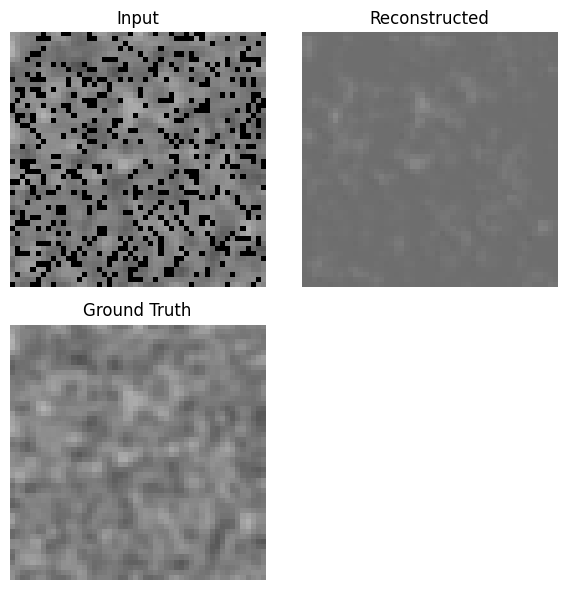

In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ------------------------------
# Settings
# ------------------------------
image_size = (50, 50)
missing_ratio = 0.20
sigma = 1
num_images = 500
num_epochs = 5

# Reproducibility
torch.manual_seed(412)
np.random.seed(412)

# ------------------------------
# Generate training data
# ------------------------------
image_pairs = [
    generate_image_with_missing_pixels(
        image_size=image_size,
        missing_ratio=missing_ratio,
        sigma=sigma,
        seed=i  # Different seed per image
    )
    for i in range(num_images)
]

# Convert images to PyTorch tensors and normalise from [0,255] to [0,1]
images_with_missing_pixels = [
    torch.from_numpy(img[0]).unsqueeze(0).unsqueeze(0).float() / 255.0
    for img in image_pairs
]
ground_truth_images = [
    torch.from_numpy(img[1]).unsqueeze(0).unsqueeze(0).float() / 255.0
    for img in image_pairs
]

# ------------------------------
# Simple CNN model
# ------------------------------
class PixelPredictionModel(nn.Module):
    def __init__(self):
        super(PixelPredictionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        return x

# Initialise model, loss function, and optimiser
model = PixelPredictionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.90)

# ------------------------------
# Training loop
# ------------------------------
for epoch in range(num_epochs):
    total_loss = 0.0
    for image, gt in zip(images_with_missing_pixels, ground_truth_images):
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, gt)
        loss.backward() # Optimise the model parameters based on the loss
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {total_loss / len(images_with_missing_pixels):.4f}")

# ------------------------------
# Test the model on a new image
# ------------------------------
sample_image, ground_truth = generate_image_with_missing_pixels(
    image_size=image_size,
    missing_ratio=missing_ratio,
    sigma=sigma,
    seed=999  # New unseen image
)

sample_image_tensor = torch.from_numpy(sample_image).unsqueeze(0).unsqueeze(0).float() / 255.0
reconstructed_image = model(sample_image_tensor).squeeze().detach().numpy() * 255.0

# ------------------------------
# Display results
# ------------------------------
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.imshow(sample_image, cmap='gray', vmin=0, vmax=255)
plt.title('Input')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(reconstructed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Reconstructed')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(ground_truth, cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')
plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
num_epochs = 5
model = PixelPredictionModel()

for lr in [0.9, 0.3, 0.1, 0.03, 0.01]:

	optimizer = optim.SGD(model.parameters(), lr=lr)

	for epoch in range(num_epochs):
		model.train()
		total_loss = 0.0

		for image, gt in zip(images_with_missing_pixels, ground_truth_images):
			optimizer.zero_grad()
			output = model(image)
			loss = criterion(output, gt)
			loss.backward()
			optimizer.step()
			total_loss += loss.item()

	print(f"Learning rate {lr} Train Loss: {total_loss / len(images_with_missing_pixels):.4f}")

Learning rate 0.9 Train Loss: 0.0033
Learning rate 0.3 Train Loss: 0.0032
Learning rate 0.1 Train Loss: 0.0032
Learning rate 0.03 Train Loss: 0.0032
Learning rate 0.01 Train Loss: 0.0032


In [23]:
num_epochs = 3
model = PixelPredictionModel()

for lr in [1e-2, 3e-3, 1e-3]:

	optimizer = optim.Adam(model.parameters(), lr=lr)

	for epoch in range(num_epochs):
		model.train()
		total_loss = 0.0

		for image, gt in zip(images_with_missing_pixels, ground_truth_images):
			optimizer.zero_grad()
			output = model(image)
			loss = criterion(output, gt)
			loss.backward()
			optimizer.step()
			total_loss += loss.item()
			
	print(f"Learning rate {lr} Train Loss: {total_loss / len(images_with_missing_pixels):.4f}")

Learning rate 0.01 Train Loss: 0.0001
Learning rate 0.003 Train Loss: 0.0001
Learning rate 0.001 Train Loss: 0.0001


Epoch 1: Train Loss: 0.0034, Evaluation Loss: 0.0004
Epoch 2: Train Loss: 0.0003, Evaluation Loss: 0.0002
Epoch 3: Train Loss: 0.0002, Evaluation Loss: 0.0002
Epoch 1: Train Loss: 0.0030, Evaluation Loss: 0.0004
Epoch 2: Train Loss: 0.0003, Evaluation Loss: 0.0002
Epoch 3: Train Loss: 0.0002, Evaluation Loss: 0.0001
Epoch 1: Train Loss: 0.0067, Evaluation Loss: 0.0007
Epoch 2: Train Loss: 0.0005, Evaluation Loss: 0.0004
Epoch 3: Train Loss: 0.0003, Evaluation Loss: 0.0003


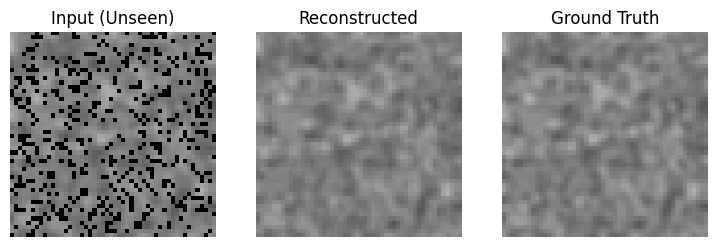

In [28]:
train_images = images_with_missing_pixels[:450]
train_gt = ground_truth_images[:450]
eval_images = images_with_missing_pixels[450:]
eval_gt = ground_truth_images[450:]

# ------------------------------
# Training loop
# ------------------------------
best_val_loss = float('inf')
best_model_state = None

for lr in [1e-2, 3e-3, 1e-3]:
    model = PixelPredictionModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for img, gt in zip(train_images, train_gt):
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, gt)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        eval_loss = 0.0
        with torch.no_grad():
            for v_img, v_gt in zip(eval_images, eval_gt):
                output = model(v_img)
                loss = criterion(output, v_gt)
                eval_loss += loss.item()

        avg_train = train_loss / len(train_images)
        avg_val = eval_loss / len(eval_images)
        print(f"Epoch {epoch+1}: Train Loss: {avg_train:.4f}, Evaluation Loss: {avg_val:.4f}")

        if avg_val < best_val_loss:
            best_val_loss = avg_val
            best_model_state = model.state_dict() # Save model weights

# ------------------------------
# Test the model on a new image
# ------------------------------
model.load_state_dict(best_model_state)
model.eval()

sample_image, ground_truth = generate_image_with_missing_pixels(
    image_size=image_size,
    missing_ratio=missing_ratio,
    sigma=sigma,
    seed=999  # New unseen image
)

sample_image_tensor = torch.from_numpy(sample_image).unsqueeze(0).unsqueeze(0).float() / 255.0

with torch.no_grad():
    reconstructed_image = model(sample_image_tensor).squeeze().cpu().numpy() * 255.0

# ------------------------------
# Display results
# ------------------------------
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(sample_image, cmap='gray', vmin=0, vmax=255)
plt.title('Input (Unseen)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Reconstructed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ground_truth, cmap='gray', vmin=0, vmax=255)
plt.title('Ground Truth')
plt.axis('off')

plt.show()